# Visualización de datos de cultivos en Canarias

```
conda install geopandas folium seaborn
```

### Importar datos y limpieza

In [1]:
import geopandas as gpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import folium
from folium import GeoJson, GeoJsonPopup, GeoJsonTooltip


import json

# Configuración de estilo
plt.figure(figsize=(10, 6))
rcParams['figure.figsize'] = 8, 6
sns.set_context('talk')

# Quito notación científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

shp_files = [
    'dat/tenerife/TF_MCultivos_2021.shp',
    'dat/el-hierro/EH_MCultivos_2022.shp',
    'dat/fuerteventura/FV_MCultivos_2020.shp',
    'dat/gran-canaria/GC_MCultivos_2019.shp',
    'dat/la-gomera/LG_MCultivos_2023.shp',
    'dat/lanzarote/LZ_MCultivos_2020.shp',
    'dat/la-palma/LP_MCultivos_2022.shp'
]

<Figure size 1000x600 with 0 Axes>

In [2]:
islands_gdfs = []
for shp in shp_files:
    gdf = gpd.read_file(shp)
    islands_gdfs.append(gdf)

gdf = gpd.GeoDataFrame(pd.concat(islands_gdfs, ignore_index=True))
gdf.head()

ISLA_NA ISLA_CO CATEGORIA   AGRUPACION                CULTIVO_NA  \
0  Tenerife   ES709  Frutales  A. Cítricos  Asociación Cítricos-Papa   
1  Tenerife   ES709  Frutales  A. Cítricos  Asociación Cítricos-Papa   
2  Tenerife   ES709  Frutales  A. Cítricos  Asociación Cítricos-Papa   
3  Tenerife   ES709  Frutales  A. Cítricos  Asociación Cítricos-Papa   
4  Tenerife   ES709  Frutales  A. Cítricos  Asociación Cítricos-Papa   

       CULTIVO_CO   BORDE_NA BORDE_CO  DISEMI_NA DISEMI_CO REGADIO_NA  \
0  CROPS_L1_L1_L3  No aplica       _Z  No aplica        _Z         No   
1  CROPS_L1_L1_L3  No aplica       _Z  No aplica        _Z         No   
2  CROPS_L1_L1_L3  No aplica       _Z  No aplica        _Z         Si   
3  CROPS_L1_L1_L3  No aplica       _Z  No aplica        _Z         Si   
4  CROPS_L1_L1_L3  No aplica       _Z  No aplica        _Z         Si   

   REGADIO_CO TECNICA_NA TECNICA_CO ABANDON_NA ABANDON_CO  AREA_M2  \
0           0  No aplica         _Z  No aplica         _Z 1480.991   
1           0  No aplica         _Z  No aplica         _Z  534.083   
2           1  No aplica         _Z  No aplica         _Z 3866.551   
3           1  No aplica         _Z  No aplica         _Z  209.132   
4           1  No aplica         _Z  No aplica         _Z  517.921   

        FECHA                                           geometry  
0  18/03/2021  POLYGON ((364802.242 3149884.192, 364798.37 31...  
1  19/04/2021  POLYGON ((333111.067 3136917.657, 333111.605 3...  
2  02/03/2021  POLYGON ((367888.393 3154123.445, 367870.705 3...  
3  19/03/2021  POLYGON ((363070.833 3154338.595, 363071.331 3...  
4  06/04/2021  POLYGON ((366828.601 3156488.692, 366828.601 3...

In [3]:
len(gdf)

466169

In [4]:
gdf.columns = [col.lower() for col in gdf.columns] # Paso a minúsculas
gdf.head()

isla_na isla_co categoria   agrupacion                cultivo_na  \
0  Tenerife   ES709  Frutales  A. Cítricos  Asociación Cítricos-Papa   
1  Tenerife   ES709  Frutales  A. Cítricos  Asociación Cítricos-Papa   
2  Tenerife   ES709  Frutales  A. Cítricos  Asociación Cítricos-Papa   
3  Tenerife   ES709  Frutales  A. Cítricos  Asociación Cítricos-Papa   
4  Tenerife   ES709  Frutales  A. Cítricos  Asociación Cítricos-Papa   

       cultivo_co   borde_na borde_co  disemi_na disemi_co regadio_na  \
0  CROPS_L1_L1_L3  No aplica       _Z  No aplica        _Z         No   
1  CROPS_L1_L1_L3  No aplica       _Z  No aplica        _Z         No   
2  CROPS_L1_L1_L3  No aplica       _Z  No aplica        _Z         Si   
3  CROPS_L1_L1_L3  No aplica       _Z  No aplica        _Z         Si   
4  CROPS_L1_L1_L3  No aplica       _Z  No aplica        _Z         Si   

   regadio_co tecnica_na tecnica_co abandon_na abandon_co  area_m2  \
0           0  No aplica         _Z  No aplica         _Z 1480.991   
1           0  No aplica         _Z  No aplica         _Z  534.083   
2           1  No aplica         _Z  No aplica         _Z 3866.551   
3           1  No aplica         _Z  No aplica         _Z  209.132   
4           1  No aplica         _Z  No aplica         _Z  517.921   

        fecha                                           geometry  
0  18/03/2021  POLYGON ((364802.242 3149884.192, 364798.37 31...  
1  19/04/2021  POLYGON ((333111.067 3136917.657, 333111.605 3...  
2  02/03/2021  POLYGON ((367888.393 3154123.445, 367870.705 3...  
3  19/03/2021  POLYGON ((363070.833 3154338.595, 363071.331 3...  
4  06/04/2021  POLYGON ((366828.601 3156488.692, 366828.601 3...

## Limpieza de datos

In [5]:
columsn_cleanup = [ col for col in gdf.columns if col.endswith('_co')] + ['borde_na', 'disemi_na', 'fecha']
gdf = gdf.drop(columsn_cleanup, axis=1)
gdf.head()

isla_na categoria   agrupacion                cultivo_na regadio_na  \
0  Tenerife  Frutales  A. Cítricos  Asociación Cítricos-Papa         No   
1  Tenerife  Frutales  A. Cítricos  Asociación Cítricos-Papa         No   
2  Tenerife  Frutales  A. Cítricos  Asociación Cítricos-Papa         Si   
3  Tenerife  Frutales  A. Cítricos  Asociación Cítricos-Papa         Si   
4  Tenerife  Frutales  A. Cítricos  Asociación Cítricos-Papa         Si   

  tecnica_na abandon_na  area_m2  \
0  No aplica  No aplica 1480.991   
1  No aplica  No aplica  534.083   
2  No aplica  No aplica 3866.551   
3  No aplica  No aplica  209.132   
4  No aplica  No aplica  517.921   

                                            geometry  
0  POLYGON ((364802.242 3149884.192, 364798.37 31...  
1  POLYGON ((333111.067 3136917.657, 333111.605 3...  
2  POLYGON ((367888.393 3154123.445, 367870.705 3...  
3  POLYGON ((363070.833 3154338.595, 363071.331 3...  
4  POLYGON ((366828.601 3156488.692, 366828.601 3...

In [6]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 466169 entries, 0 to 466168
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   isla_na     466169 non-null  object  
 1   categoria   292347 non-null  object  
 2   agrupacion  292347 non-null  object  
 3   cultivo_na  466169 non-null  object  
 4   regadio_na  466169 non-null  object  
 5   tecnica_na  466056 non-null  object  
 6   abandon_na  466169 non-null  object  
 7   area_m2     466169 non-null  float64 
 8   geometry    466169 non-null  geometry
dtypes: float64(1), geometry(1), object(7)
memory usage: 32.0+ MB


In [7]:
def show_missing_data():
    total = gdf.isnull().sum().sort_values(ascending=False)
    percent_1 = gdf.isnull().sum() / gdf.isnull().count()*100
    percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent_2], axis=1, keys=['total', 'pct'])
    return missing_data[missing_data.total > 0] 

missing_data = show_missing_data()
missing_data

total    pct
categoria   173822 37.300
agrupacion  173822 37.300
tecnica_na     113  0.000

Viendo los datos, hay un 37% de cultivos que no tienen categoría ni agrupación. Por otro lado, hay un pequeño porcentaje de cultivos que no tienene espeficada la técnica de cultivo. Vamos a corregir primero las categorías y agrupaciones.

In [8]:
# Extraigo la lista de cultivos con sus categorías y agrupaciones
categorias = gdf[['cultivo_na', 'categoria', 'agrupacion']].sort_values(by='categoria', na_position='last')
categorias = categorias.loc[gdf.categoria.notnull() & gdf.agrupacion.notnull()].drop_duplicates().reset_index(drop=True)
categorias

cultivo_na categoria          agrupacion
0        Asociación Cítricos-Papa  Frutales         A. Cítricos
1          Templado Otras Mezclas  Frutales  Frutales Templados
2                 Templado Pepita  Frutales  Frutales Templados
3                        Cítricos  Frutales            Cítricos
4                  Templado Hueso  Frutales  Frutales Templados
..                            ...       ...                 ...
56      Asociación Viña-Templados      Viña             A. Viña
57         Asociación Viña-Tunera      Viña             A. Viña
58       Asociación Viña-Barbecho      Viña             A. Viña
59  Asociación Viña-Huerta Limpia      Viña             A. Viña
60       Asociación Viña-Cítricos      Viña             A. Viña

[61 rows x 3 columns]

In [9]:
# Mergeo la lista de categorías por cultivo, para que aquellos cultivos que no tengan categoría la tengan ahora si existe
tmp = gdf.merge(categorias, how='left', on='cultivo_na')
tmp.head()

isla_na categoria_x agrupacion_x                cultivo_na regadio_na  \
0  Tenerife    Frutales  A. Cítricos  Asociación Cítricos-Papa         No   
1  Tenerife    Frutales  A. Cítricos  Asociación Cítricos-Papa         No   
2  Tenerife    Frutales  A. Cítricos  Asociación Cítricos-Papa         Si   
3  Tenerife    Frutales  A. Cítricos  Asociación Cítricos-Papa         Si   
4  Tenerife    Frutales  A. Cítricos  Asociación Cítricos-Papa         Si   

  tecnica_na abandon_na  area_m2  \
0  No aplica  No aplica 1480.991   
1  No aplica  No aplica  534.083   
2  No aplica  No aplica 3866.551   
3  No aplica  No aplica  209.132   
4  No aplica  No aplica  517.921   

                                            geometry categoria_y agrupacion_y  
0  POLYGON ((364802.242 3149884.192, 364798.37 31...    Frutales  A. Cítricos  
1  POLYGON ((333111.067 3136917.657, 333111.605 3...    Frutales  A. Cítricos  
2  POLYGON ((367888.393 3154123.445, 367870.705 3...    Frutales  A. Cítricos  
3  POLYGON ((363070.833 3154338.595, 363071.331 3...    Frutales  A. Cítricos  
4  POLYGON ((366828.601 3156488.692, 366828.601 3...    Frutales  A. Cítricos

In [10]:
gdf['categoria'] = tmp['categoria_y'].copy()
gdf['agrupacion'] = tmp['agrupacion_y'].copy()
gdf[gdf.categoria.isnull()]

isla_na categoria agrupacion       cultivo_na regadio_na  \
203416  Fuerteventura       NaN        NaN  Pastos Pastizal         Si   
203417  Fuerteventura       NaN        NaN  Pastos Pastizal         Si   
224706   Gran Canaria       NaN        NaN  Pastos Pastizal         No   
224707   Gran Canaria       NaN        NaN  Pastos Pastizal         No   
224708   Gran Canaria       NaN        NaN  Pastos Pastizal         No   
...               ...       ...        ...              ...        ...   
368223      Lanzarote       NaN        NaN  Pastos Pastizal         Si   
368224      Lanzarote       NaN        NaN  Pastos Pastizal         Si   
368225      Lanzarote       NaN        NaN  Pastos Pastizal         Si   
368226      Lanzarote       NaN        NaN  Pastos Pastizal         No   
368227      Lanzarote       NaN        NaN  Pastos Pastizal         No   

                  tecnica_na abandon_na  area_m2  \
203416                 Gavia  No aplica  517.966   
203417                 Gavia  No aplica  824.636   
224706             No aplica  No aplica 1733.173   
224707             No aplica  No aplica 1071.046   
224708             No aplica  No aplica 1021.174   
...                      ...        ...      ...   
368223  Enarenado artificial  No aplica 2017.343   
368224     Enarenado natural  No aplica  343.249   
368225  Enarenado artificial  No aplica  974.185   
368226             No aplica  No aplica 1255.766   
368227  Enarenado artificial  No aplica 1648.547   

                                                 geometry  
203416  POLYGON ((606521.797 3154497.961, 606522.245 3...  
203417  POLYGON ((606516.102 3154517.413, 606516.318 3...  
224706  POLYGON ((454097.7 3109405.014, 454096.244 310...  
224707  POLYGON ((454196.537 3109482.45, 454194.627 31...  
224708  POLYGON ((459443.087 3087135.361, 459441.968 3...  
...                                                   ...  
368223  POLYGON ((644017.739 3211459.714, 643983.898 3...  
368224  POLYGON ((631410.759 3205528.946, 631395.78 32...  
368225  POLYGON ((643209.741 3214558.841, 643209.421 3...  
368226  POLYGON ((646636.969 3226914.966, 646634.025 3...  
368227  POLYGON ((647562.199 3231025.823, 647560.701 3...  

[695 rows x 9 columns]

In [11]:
missing_data = show_missing_data()
missing_data

total   pct
categoria     695 0.100
agrupacion    695 0.100
tecnica_na    113 0.000

In [12]:
# Reviso qué cultivos son los que no tienen categoría
gdf[gdf.categoria.isnull() & gdf.agrupacion.isnull()].cultivo_na.unique()

array(['Pastos Pastizal', 'Pastos Tagasaste'], dtype=object)

Los datos de `Pastos Pastizal` y `Pastos Tagasaste` no tienen categoría por lo que voy a inputarselo manualmente viendo la documentación del dataset. Revisando el documento PDF [METODOLOGÍA DEL MAPA DE CULTIVOS DE CANARIAS](https://opendata.sitcan.es/upload/medio-rural/gobcan_mapa-cultivos_metodologia.pdf), los cultivos de Tagasaste y Pastizal se clasifican como **Cereales y Leguminosas**. Por este motivo, voy a aplicarles la categoría de `Otros` y la agrupación `Cereales, Leguminosas y Forrajeras`.

In [13]:
gdf.loc[(gdf.cultivo_na == 'Pastos Pastizal') | (gdf.cultivo_na == 'Pastos Tagasaste'), 'categoria'] = 'Otros'
gdf.loc[(gdf.cultivo_na == 'Pastos Pastizal') | (gdf.cultivo_na == 'Pastos Tagasaste'), 'agrupacion'] = 'Cereales, Leguminosas y Forrajeras'
gdf.loc[(gdf.cultivo_na == 'Pastos Tagasaste'), 'cultivo_na'] = 'Tagasaste'
gdf[gdf.cultivo_na == 'Pastos Pastizal'].head()

isla_na categoria                          agrupacion  \
203416  Fuerteventura     Otros  Cereales, Leguminosas y Forrajeras   
203417  Fuerteventura     Otros  Cereales, Leguminosas y Forrajeras   
224706   Gran Canaria     Otros  Cereales, Leguminosas y Forrajeras   
224707   Gran Canaria     Otros  Cereales, Leguminosas y Forrajeras   
224708   Gran Canaria     Otros  Cereales, Leguminosas y Forrajeras   

             cultivo_na regadio_na tecnica_na abandon_na  area_m2  \
203416  Pastos Pastizal         Si      Gavia  No aplica  517.966   
203417  Pastos Pastizal         Si      Gavia  No aplica  824.636   
224706  Pastos Pastizal         No  No aplica  No aplica 1733.173   
224707  Pastos Pastizal         No  No aplica  No aplica 1071.046   
224708  Pastos Pastizal         No  No aplica  No aplica 1021.174   

                                                 geometry  
203416  POLYGON ((606521.797 3154497.961, 606522.245 3...  
203417  POLYGON ((606516.102 3154517.413, 606516.318 3...  
224706  POLYGON ((454097.7 3109405.014, 454096.244 310...  
224707  POLYGON ((454196.537 3109482.45, 454194.627 31...  
224708  POLYGON ((459443.087 3087135.361, 459441.968 3...

In [14]:
gdf['tecnica_na'].unique()

array(['No aplica', 'Jable', 'Invernadero', 'Enarenado artificial',
       'Transformación', 'Gavia', None, 'Otras Técnicas', 'Pastoreo',
       'Enarenado natural'], dtype=object)

In [15]:
gdf.loc[gdf.tecnica_na.isnull(), 'tecnica_na'] = 'No aplica'

In [16]:
gdf['tecnica_na'] = gdf['tecnica_na'].apply(lambda x: 'No aplica' if x == '' else x)
gdf['tecnica_na'].unique()

array(['No aplica', 'Jable', 'Invernadero', 'Enarenado artificial',
       'Transformación', 'Gavia', 'Otras Técnicas', 'Pastoreo',
       'Enarenado natural'], dtype=object)

In [17]:
gdf['regadio_na'] = gdf['regadio_na'].apply(lambda x: 'Si' if x == 'Sí' else x)
gdf['regadio_na'].unique()

array(['No', 'Si'], dtype=object)

In [18]:
gdf.head()

isla_na categoria   agrupacion                cultivo_na regadio_na  \
0  Tenerife  Frutales  A. Cítricos  Asociación Cítricos-Papa         No   
1  Tenerife  Frutales  A. Cítricos  Asociación Cítricos-Papa         No   
2  Tenerife  Frutales  A. Cítricos  Asociación Cítricos-Papa         Si   
3  Tenerife  Frutales  A. Cítricos  Asociación Cítricos-Papa         Si   
4  Tenerife  Frutales  A. Cítricos  Asociación Cítricos-Papa         Si   

  tecnica_na abandon_na  area_m2  \
0  No aplica  No aplica 1480.991   
1  No aplica  No aplica  534.083   
2  No aplica  No aplica 3866.551   
3  No aplica  No aplica  209.132   
4  No aplica  No aplica  517.921   

                                            geometry  
0  POLYGON ((364802.242 3149884.192, 364798.37 31...  
1  POLYGON ((333111.067 3136917.657, 333111.605 3...  
2  POLYGON ((367888.393 3154123.445, 367870.705 3...  
3  POLYGON ((363070.833 3154338.595, 363071.331 3...  
4  POLYGON ((366828.601 3156488.692, 366828.601 3...

In [19]:
missing_data = show_missing_data()
missing_data

Empty DataFrame
Columns: [total, pct]
Index: []

Ya tengo los datos limpios y listos para ser consultados

Para simplificar el dataset voy a convertir las asociaciones en el cultivo principal (por ejemplo, Asociacion Viña-Barbecho será Viña):

In [20]:
def print_categorias():
    print(f'Categorías: {gdf.categoria.unique()}\n')
    print(f'Agrupaciones: {gdf.agrupacion.unique()}\n')
    print(f'Cultivos: {gdf.cultivo_na.unique()}\n')

print_categorias()

Categorías: ['Frutales' 'Huerta' 'Viña' 'Otros'
 'Pastoreo sobre superficie no agrícola' 'Ornamentales' 'Platanera'
 'Superficie agrícola no utilizada'
 'Pastoreo sobre superficie agrícola no utilizada' 'Tomate']

Agrupaciones: ['A. Cítricos' 'A. Templados' 'A. Viña' 'Barbecho' 'Cítricos'
 'Cereales, Leguminosas y Forrajeras'
 'Pastoreo sobre superficie no agrícola' 'Frutales Subtropicales'
 'Frutales Templados' 'Huerto Familiar' 'Hortalizas' 'Ornamentales' 'Papa'
 'Platanera' 'Superficie agrícola no utilizada'
 'Pastoreo sobre superficie agrícola no utilizada' 'Tomate' 'Viña']

Cultivos: ['Asociación Cítricos-Papa' 'Asociación Cítricos-Hortaliza'
 'Asociación Cítricos-Ornamentales' 'Asociación Templados-Millo'
 'Asociación Templados-Papa' 'Asociación Viña-Barbecho'
 'Asociación Viña-Templados' 'Asociación Viña-Huerta Limpia'
 'Asociación Viña-Cítricos' 'Asociación Viña-Hortaliza'
 'Asociación Viña-Tunera' 'Asociación Viña-Papa' 'Barbecho'
 'Huerta Limpia' 'Cítricos' 'Leguminosa' 'Mill

In [21]:
# Junto Pastoreo sobre superficie agrícola y no agrícola en uno
gdf.loc[gdf.agrupacion.str.contains(r'^Pastoreo', regex=True), ['agrupacion', 'categoria', 'cultivo_na']] = 'Pastoreo'

In [22]:
# Reescribo las asociaciones de cultivo en uno (por ejemplo, A. Viña será Viña)
gdf['agrupacion'] = gdf['agrupacion'].str.replace(r'^A\. ', '', regex=True)
gdf.loc[gdf.agrupacion == 'Templados', 'agrupacion'] = 'Frutales Templados'

In [23]:
# Reescribo las asociaciones de cultivo en uno (por ejemplo, Asociación Viña-Papa será Viña)
gdf['cultivo_na'] = gdf['cultivo_na'].str.replace(r'^Asociación ', '', regex=True)
gdf['cultivo_na'] = gdf['cultivo_na'].str.split('-').str[0]

# Exploración inicial de datos

In [24]:
gdf.isla_na.unique()

array(['Tenerife', 'El Hierro', 'Fuerteventura', 'Gran Canaria',
       'La Gomera', 'Lanzarote', 'La Palma'], dtype=object)

In [25]:
print_categorias()

Categorías: ['Frutales' 'Huerta' 'Viña' 'Otros' 'Pastoreo' 'Ornamentales' 'Platanera'
 'Superficie agrícola no utilizada' 'Tomate']

Agrupaciones: ['Cítricos' 'Frutales Templados' 'Viña' 'Barbecho'
 'Cereales, Leguminosas y Forrajeras' 'Pastoreo' 'Frutales Subtropicales'
 'Huerto Familiar' 'Hortalizas' 'Ornamentales' 'Papa' 'Platanera'
 'Superficie agrícola no utilizada' 'Tomate']

Cultivos: ['Cítricos' 'Templados' 'Viña' 'Barbecho' 'Huerta Limpia' 'Leguminosa'
 'Millo' 'Cereal Otros' 'Pastoreo' 'Aguacate' 'Aloe' 'Mango' 'Moringa'
 'Subtropicales Otras Mezclas' 'Papaya' 'Piña' 'Parchita' 'Pitaya'
 'Tunera' 'Almendro' 'Frutos Rojos' 'Granado' 'Templado Hueso' 'Higuera'
 'Olivo' 'Templado Otras Mezclas' 'Templado Pepita' 'Huerto Familiar'
 'Batata' 'Caña de Azúcar' 'Cebolla' 'Fresas' 'Melón' 'Ñame'
 'Hortaliza Otras Mezclas' 'Pepino' 'Tabaco' 'Aromáticas' 'Ornamentales'
 'Próteas' 'Strelitzias' 'Viveros' 'Papa' 'Platanera' 'Tagasaste'
 'Superficie agrícola no utilizada' 'Tomate' 'Otras F

In [26]:
# Categorías, agrupaciones y cultivos que corresponden a terreno no cultivable
categorias_no_cultivo = ['Pastoreo', 'Superficie agrícola no utilizada']
categorias_no_cultivo

['Pastoreo', 'Superficie agrícola no utilizada']

In [27]:
gdf['tecnica_na'].unique()

array(['No aplica', 'Jable', 'Invernadero', 'Enarenado artificial',
       'Transformación', 'Gavia', 'Otras Técnicas', 'Pastoreo',
       'Enarenado natural'], dtype=object)

In [28]:
gdf['abandon_na'].unique()

array(['No aplica', 'No', 'Sí, cultivo abandonado', 'Sí, prolongado',
       'Sí, reciente'], dtype=object)

In [29]:
gdf['regadio_na'].unique()

array(['No', 'Si'], dtype=object)

## Unión con municipios

Finalmente, voy a mergear un shp con las delimitaciones de los municipios de cada isla para sacar métricas sobre los cultivos desglosados por cada municipio

In [30]:
gdf_mun = gpd.read_file('dat/municipios/municipios.shp', encoding='utf-8')
gdf_mun.columns = [col.lower() for col in gdf_mun.columns] # Paso a minúsculas
gdf_mun.head(3)

geocode  geopadre etiqueta                    notas  granularid gcd_provin  \
0   35001  ES705A22   Agaete   Ayuntamiento de Agaete  MUNICIPIOS      ES701   
1   35002  ES705A32  Agüimes  Ayuntamiento de Agüimes  MUNICIPIOS      ES701   
2   35003  ES704A01  Antigua  Ayuntamiento De Antigua  MUNICIPIOS      ES701   

  gcd_isla gcd_granco gcd_comarc   ign_sup  ign_perim      utm_x       utm_y  \
0    ES705    ES705A2   ES705A22  4451.160  41038.000 432237.320 3105495.860   
1    ES705    ES705A3   ES705A32  7889.720  55508.000 455417.290 3085973.990   
2    ES704    ES704A0   ES704A01 25024.800  79292.000 603336.940 3136732.920   

   longitud  latitud  utm_x_capi  utm_y_capi  long_capi  lati_capi  \
0   -15.690   28.073  431360.280 3108387.710    -15.699     28.099   
1   -15.453   27.898  456117.580 3086639.880    -15.446     27.904   
2   -13.946   28.353  596564.740 3144502.790    -14.014     28.423   

                                            geometry  
0  POLYGON ((-15.74604 28.05106, -15.74575 28.050...  
1  POLYGON ((-15.3869 27.90251, -15.3869 27.90251...  
2  POLYGON ((-13.91951 28.25149, -13.91952 28.251...

In [31]:
gdf_mun = gdf_mun[['etiqueta', 'geometry']]
gdf_mun.head()

etiqueta                                           geometry
0    Agaete  POLYGON ((-15.74604 28.05106, -15.74575 28.050...
1   Agüimes  POLYGON ((-15.3869 27.90251, -15.3869 27.90251...
2   Antigua  POLYGON ((-13.91951 28.25149, -13.91952 28.251...
3  Arrecife  POLYGON ((-13.58359 28.95197, -13.58359 28.951...
4  Artenara  POLYGON ((-15.74959 27.98801, -15.74974 27.988...

In [32]:
gdf = gdf.to_crs(gdf_mun.crs)

In [33]:
gdf_joined_mun = gpd.sjoin(gdf, gdf_mun, how="left", predicate="covered_by")
gdf_joined_mun = gdf_joined_mun.rename(columns={'etiqueta': 'municipio'})
gdf_joined_mun = gdf_joined_mun.drop(['index_right'], axis=1)
gdf_joined_mun.head()

isla_na categoria agrupacion cultivo_na regadio_na tecnica_na abandon_na  \
0  Tenerife  Frutales   Cítricos   Cítricos         No  No aplica  No aplica   
1  Tenerife  Frutales   Cítricos   Cítricos         No  No aplica  No aplica   
2  Tenerife  Frutales   Cítricos   Cítricos         Si  No aplica  No aplica   
3  Tenerife  Frutales   Cítricos   Cítricos         Si  No aplica  No aplica   
4  Tenerife  Frutales   Cítricos   Cítricos         Si  No aplica  No aplica   

   area_m2                                           geometry  \
0 1480.991  POLYGON ((-16.38099 28.46855, -16.38103 28.468...   
1  534.083  POLYGON ((-16.70272 28.34788, -16.70272 28.347...   
2 3866.551  POLYGON ((-16.34996 28.50712, -16.35014 28.506...   
3  209.132  POLYGON ((-16.3992 28.50856, -16.3992 28.50856...   
4  517.921  POLYGON ((-16.36106 28.52835, -16.36106 28.528...   

                    municipio  
0                   Tacoronte  
1           Icod de los Vinos  
2                    Tegueste  
3                   Tacoronte  
4  San Cristóbal de La Laguna

In [34]:
len(gdf_joined_mun[gdf_joined_mun.municipio.isnull()])

1903

Mostrando en el mapa las parcelas de cultivo que no tienen municipio asignado, podemos observar que dichas parcelas no han sido asignadas a un municipio ya que caen justo en las lindes de algunos municipios por lo que le merge no le asigna ningún municipio.

Para arreglarlo, dependiendo del porcentaje de área que caiga en cada municipio, se asignará a un municipio u a otro.

In [35]:
gdf_joined_mun_no_muni = gdf_joined_mun[gdf_joined_mun.municipio.isnull()].to_crs(epsg=4326)

center = [28.1464, -15.4293]
map = folium.Map(location=center, zoom_start=7.5)
GeoJson(gdf_joined_mun_no_muni).add_to(map)
map

In [36]:
gdf_joined_mun = gdf_joined_mun.to_crs(epsg=4083)
gdf_mun_projected = gdf_mun.to_crs(epsg=4083)

In [37]:
def calcular_municipio_segun_area_overlay(parcela):
    """
    Calcula el municipio para una parcela basándose en el mayor porcentaje de área intersectada.

    Parameters:
        parcela (GeoSeries): Fila del GeoDataFrame de parcelas.

    Returns:
        str: Nombre del municipio con mayor área intersectada o None si no hay intersección.
    """
    parcela_gdf = gpd.GeoDataFrame([parcela], geometry='geometry', crs=gdf_mun_projected.crs)

    intersecciones = gpd.overlay(parcela_gdf, gdf_mun_projected, how='intersection')

    if intersecciones.empty:
        print('Este es empty')
        return None

    intersecciones['area_interseccion'] = intersecciones.geometry.area

    municipio_mayor_area = intersecciones.loc[intersecciones['area_interseccion'].idxmax(), 'etiqueta']

    return municipio_mayor_area

In [38]:
gdf_joined_mun['municipio'] = gdf_joined_mun.apply(
    lambda row: calcular_municipio_segun_area_overlay(row) if pd.isnull(row['municipio']) else row['municipio'],
    axis=1
)
gdf_joined_mun.head()

isla_na categoria agrupacion cultivo_na regadio_na tecnica_na abandon_na  \
0  Tenerife  Frutales   Cítricos   Cítricos         No  No aplica  No aplica   
1  Tenerife  Frutales   Cítricos   Cítricos         No  No aplica  No aplica   
2  Tenerife  Frutales   Cítricos   Cítricos         Si  No aplica  No aplica   
3  Tenerife  Frutales   Cítricos   Cítricos         Si  No aplica  No aplica   
4  Tenerife  Frutales   Cítricos   Cítricos         Si  No aplica  No aplica   

   area_m2                                           geometry  \
0 1480.991  POLYGON ((364802.242 3149884.192, 364798.37 31...   
1  534.083  POLYGON ((333111.067 3136917.657, 333111.605 3...   
2 3866.551  POLYGON ((367888.393 3154123.445, 367870.705 3...   
3  209.132  POLYGON ((363070.833 3154338.595, 363071.331 3...   
4  517.921  POLYGON ((366828.601 3156488.692, 366828.601 3...   

                    municipio  
0                   Tacoronte  
1           Icod de los Vinos  
2                    Tegueste  
3                   Tacoronte  
4  San Cristóbal de La Laguna

In [39]:
gdf_joined_mun[gdf_joined_mun.municipio.isnull()]

Empty GeoDataFrame
Columns: [isla_na, categoria, agrupacion, cultivo_na, regadio_na, tecnica_na, abandon_na, area_m2, geometry, municipio]
Index: []

In [40]:
gdf = gdf_joined_mun.copy()

In [44]:
print_categorias()

Categorías: ['Frutales' 'Huerta' 'Viña' 'Otros' 'Pastoreo' 'Ornamentales' 'Platanera'
 'Superficie agrícola no utilizada' 'Tomate']

Agrupaciones: ['Cítricos' 'Frutales Templados' 'Viña' 'Barbecho'
 'Cereales, Leguminosas y Forrajeras' 'Pastoreo' 'Frutales Subtropicales'
 'Huerto Familiar' 'Hortalizas' 'Ornamentales' 'Papa' 'Platanera'
 'Superficie agrícola no utilizada' 'Tomate']

Cultivos: ['Cítricos' 'Templados' 'Viña' 'Barbecho' 'Huerta Limpia' 'Leguminosa'
 'Millo' 'Cereal Otros' 'Pastoreo' 'Aguacate' 'Aloe' 'Mango' 'Moringa'
 'Subtropicales Otras Mezclas' 'Papaya' 'Piña' 'Parchita' 'Pitaya'
 'Tunera' 'Almendro' 'Frutos Rojos' 'Granado' 'Templado Hueso' 'Higuera'
 'Olivo' 'Templado Otras Mezclas' 'Templado Pepita' 'Huerto Familiar'
 'Batata' 'Caña de Azúcar' 'Cebolla' 'Fresas' 'Melón' 'Ñame'
 'Hortaliza Otras Mezclas' 'Pepino' 'Tabaco' 'Aromáticas' 'Ornamentales'
 'Próteas' 'Strelitzias' 'Viveros' 'Papa' 'Platanera' 'Tagasaste'
 'Superficie agrícola no utilizada' 'Tomate' 'Otras F

C:\Users\cuent\AppData\Local\Temp\ipykernel_9576\4156060812.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, y="Tipo de Superficie", x="Superficie (m²)", palette="coolwarm", orient="h")


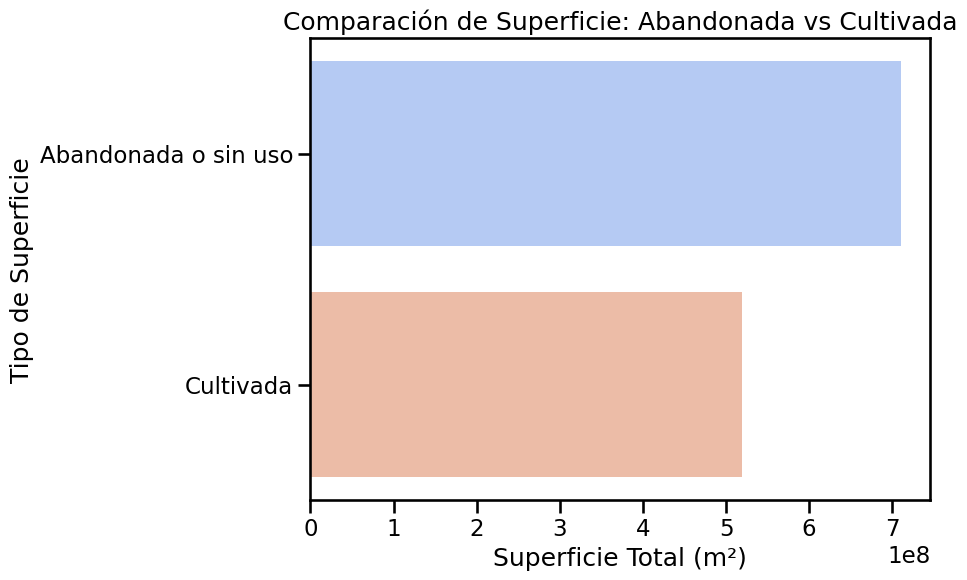

In [46]:
# Filtrar datos
superficie_abandonada = gdf[(gdf["categoria"] == "Superficie agrícola no utilizada") | (gdf["abandon_na"] == "Si")]["area_m2"].sum()
superficie_cultivada = gdf[~((gdf["categoria"] == "Superficie agrícola no utilizada") | (gdf["abandon_na"] == "Si"))]["area_m2"].sum()

# Preparar datos para la gráfica
data = {
    "Tipo de Superficie": ["Abandonada o sin uso", "Cultivada"],
    "Superficie (m²)": [superficie_abandonada, superficie_cultivada]
}

# Crear un DataFrame
import pandas as pd
df_plot = pd.DataFrame(data)

# Crear la gráfica
sns.barplot(data=df_plot, y="Tipo de Superficie", x="Superficie (m²)", palette="coolwarm", orient="h")
plt.title("Comparación de Superficie: Abandonada vs Cultivada")
plt.xlabel("Superficie Total (m²)")
plt.ylabel("Tipo de Superficie")
plt.show()

C:\Users\cuent\AppData\Local\Temp\ipykernel_9576\1062793176.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, y="Tipo de Superficie", x="Superficie (m²)", palette="coolwarm", orient="h")


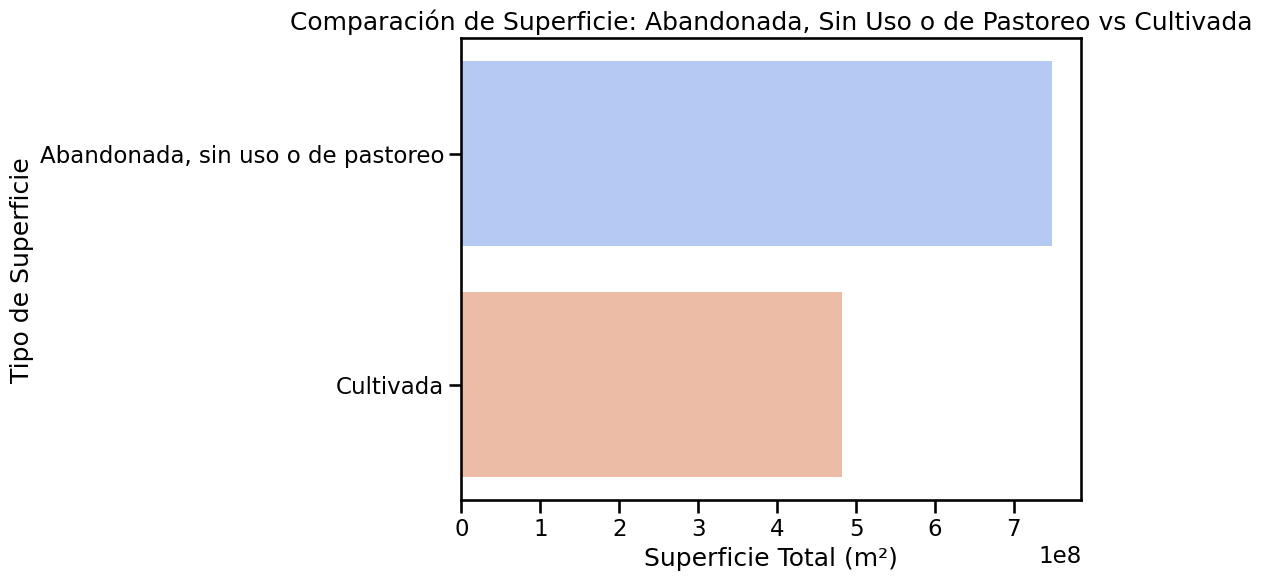

In [47]:
# Filtrar datos
superficie_abandonada_pastoreo = gdf[
    (gdf["categoria"] == "Superficie agrícola no utilizada") | 
    (gdf["abandon_na"] == "Si") | 
    (gdf["categoria"] == "Pastoreo")
]["area_m2"].sum()

superficie_cultivada = gdf[
    ~((gdf["categoria"] == "Superficie agrícola no utilizada") | 
      (gdf["abandon_na"] == "Si") | 
      (gdf["categoria"] == "Pastoreo"))
]["area_m2"].sum()

# Preparar datos para la gráfica
data = {
    "Tipo de Superficie": ["Abandonada, sin uso o de pastoreo", "Cultivada"],
    "Superficie (m²)": [superficie_abandonada_pastoreo, superficie_cultivada]
}

# Crear un DataFrame
df_plot = pd.DataFrame(data)

# Crear la gráfica
sns.barplot(data=df_plot, y="Tipo de Superficie", x="Superficie (m²)", palette="coolwarm", orient="h")
plt.title("Comparación de Superficie: Abandonada, Sin Uso o de Pastoreo vs Cultivada")
plt.xlabel("Superficie Total (m²)")
plt.ylabel("Tipo de Superficie")
plt.show()


C:\Users\cuent\AppData\Local\Temp\ipykernel_9576\3484245051.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cultivo_areas_top, x="area_m2", y="cultivo_na", palette="viridis", orient="h")


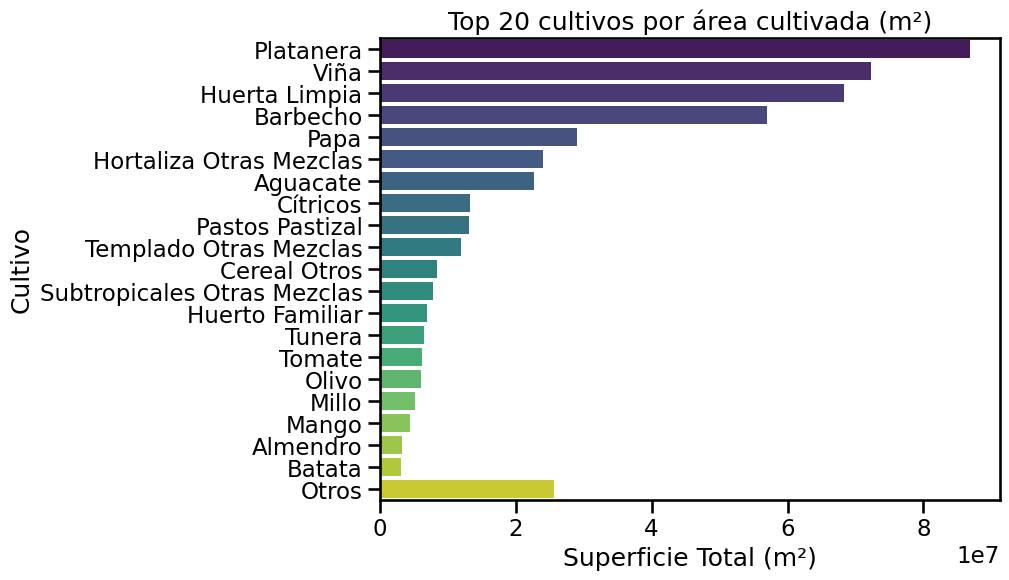

In [49]:
# Filtrar solo cultivos (excluir abandonados, sin uso y pastoreo)
df_cultivado = gdf[
    ~((gdf["categoria"] == "Superficie agrícola no utilizada") | 
      (gdf["categoria"] == "Pastoreo") | 
      (gdf["abandon_na"] == "Si"))
]

# Agrupar por cultivo y calcular la superficie total
cultivo_areas = df_cultivado.groupby("cultivo_na")["area_m2"].sum().reset_index()

# Ordenar de mayor a menor por área
cultivo_areas = cultivo_areas.sort_values(by="area_m2", ascending=False)

# Separar los 20 cultivos principales y agrupar el resto en "Otros"
top_20 = cultivo_areas.head(20)
otros = pd.DataFrame({
    "cultivo_na": ["Otros"],
    "area_m2": [cultivo_areas.iloc[20:]["area_m2"].sum()]
})
cultivo_areas_top = pd.concat([top_20, otros])

# Crear la gráfica
sns.barplot(data=cultivo_areas_top, x="area_m2", y="cultivo_na", palette="viridis", orient="h")
plt.title("Top 20 cultivos por área cultivada (m²)")
plt.xlabel("Superficie Total (m²)")
plt.ylabel("Cultivo")
plt.show()

C:\Users\cuent\AppData\Local\Temp\ipykernel_9576\3637689419.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=categoria_areas_top, x="area_m2", y="categoria", palette="viridis", orient="h")


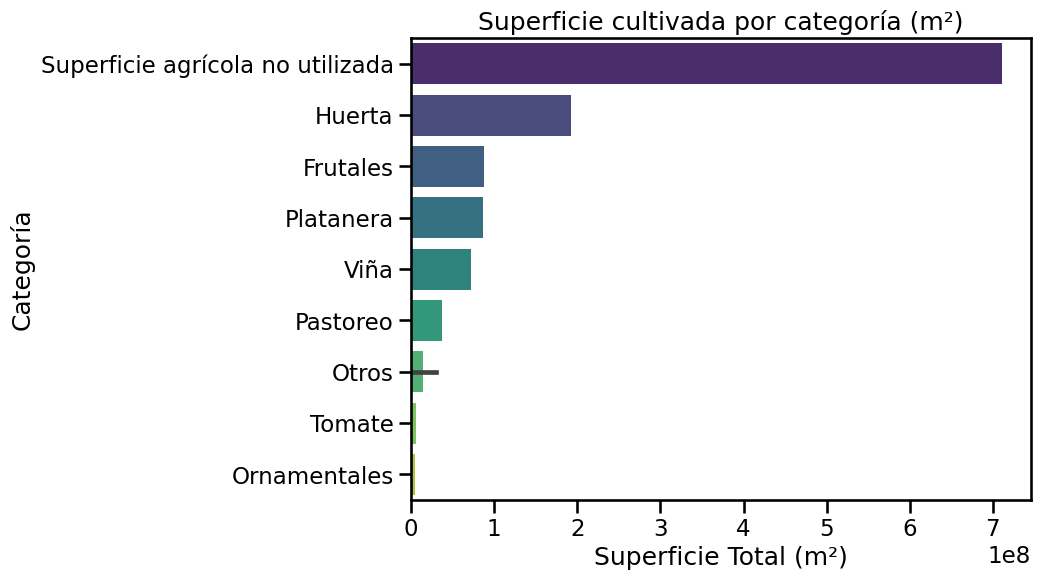

In [51]:
# Agrupar por categoría y calcular la superficie total
categoria_areas = gdf.groupby("categoria")["area_m2"].sum().reset_index()

# Ordenar de mayor a menor por área
categoria_areas = categoria_areas.sort_values(by="area_m2", ascending=False)

# Separar las 20 categorías principales y agrupar el resto en "Otros"
top_20 = categoria_areas.head(20)
otros = pd.DataFrame({
    "categoria": ["Otros"],
    "area_m2": [categoria_areas.iloc[20:]["area_m2"].sum()]
})
categoria_areas_top = pd.concat([top_20, otros])

# Crear la gráfica
sns.barplot(data=categoria_areas_top, x="area_m2", y="categoria", palette="viridis", orient="h")
plt.title("Superficie cultivada por categoría (m²)")
plt.xlabel("Superficie Total (m²)")
plt.ylabel("Categoría")
plt.show()

- Ver los cultivos por isla para ver si son similares o si hay alguno que despunta
- Ver municipios con más cultivo en Canarias y Gran Canaria
- y listo